In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV

In [5]:
# Load dataset
data = pd.read_csv("Phishing_Legitimate_full.csv")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   id                                  10000 non-null  int64  
 1   NumDots                             10000 non-null  int64  
 2   SubdomainLevel                      10000 non-null  int64  
 3   PathLevel                           10000 non-null  int64  
 4   UrlLength                           10000 non-null  int64  
 5   NumDash                             10000 non-null  int64  
 6   NumDashInHostname                   10000 non-null  int64  
 7   AtSymbol                            10000 non-null  int64  
 8   TildeSymbol                         10000 non-null  int64  
 9   NumUnderscore                       10000 non-null  int64  
 10  NumPercent                          10000 non-null  int64  
 11  NumQueryComponents                  10000 

<Axes: >

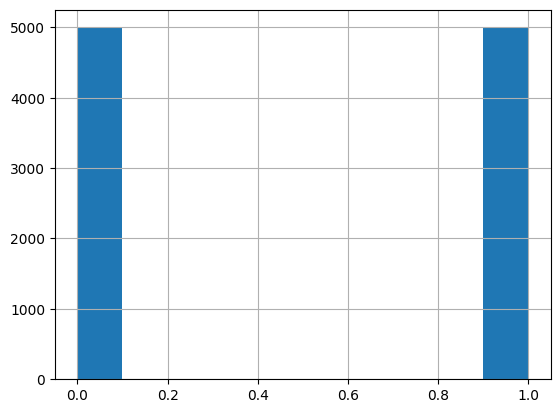

In [6]:
# Data Exploration
data.head()  # Display first five rows
data.info()  # Information about dataset
data.describe()  # Statistical summary
data.max(axis=0)  # Maximum values in each column
data.drop('id', axis=1, inplace=True)  # Drop 'id' column as it's not useful for prediction
data['CLASS_LABEL'].hist()  # Histogram of the class label


In [8]:
# Splitting data into features and labels
X = data.drop("CLASS_LABEL", axis=1)  # Features
y = data["CLASS_LABEL"]  # Labels
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)  # Split data

# Model Training with Random Forest Classifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [10]:
# Model Prediction
pred = model.predict(X_test)

# Model Evaluation
accuracy = accuracy_score(y_test, pred)
print("Accuracy:", accuracy)
precision = precision_score(y_test, pred)
print("Precision:", precision)
recall = recall_score(y_test, pred)
print("Recall:", recall)


Accuracy: 0.9844
Precision: 0.9827721221613156
Recall: 0.9866352201257862


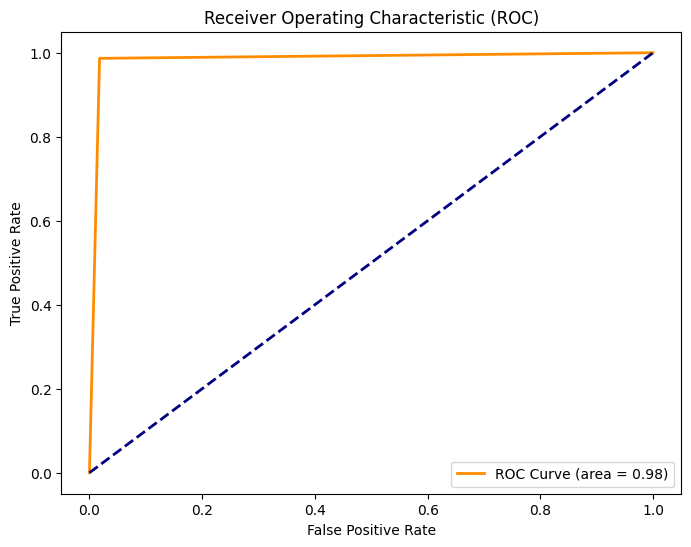

In [11]:
# ROC Curve
fpr, tpr, _ = roc_curve(y_test, pred)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC Curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

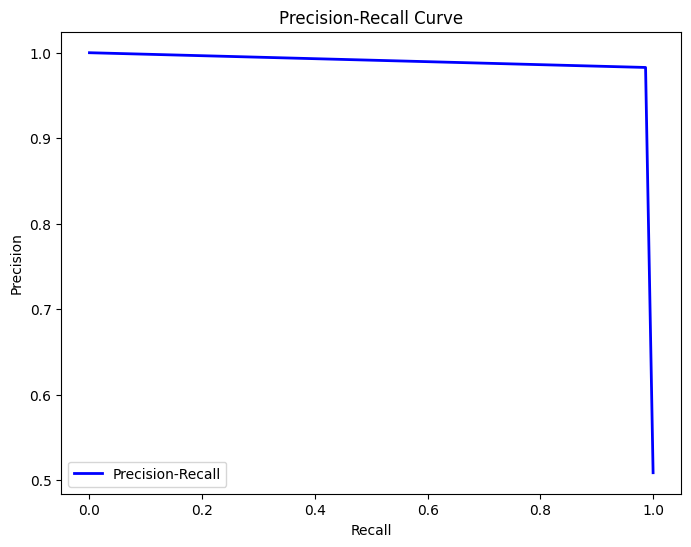

In [12]:
# Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, pred)
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='blue', lw=2, label='Precision-Recall')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()

In [13]:
# Hyperparameter Optimization
param_dist = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt'],
    'max_depth': [10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True]
}

# Hyperparameter Tuning using Randomized Search CV
rfs_random = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                verbose=1, n_iter=10, cv=5, random_state=42, n_jobs=-1)
rfs_random.fit(X_train, y_train)
print("Best Parameters:", rfs_random.best_params_)

# Best Estimator Evaluation
best_rfs = rfs_random.best_estimator_
rfs_best_pred = best_rfs.predict(X_test)
print("Improved Accuracy:", accuracy_score(y_test, rfs_best_pred))
print("Improved ROC-AUC Score:", roc_auc_score(y_test, rfs_best_pred))
print("Improved Classification Report:\n", classification_report(y_test, rfs_best_pred))
print("Improved Confusion Matrix:\n", confusion_matrix(y_test, rfs_best_pred))


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 50, 'bootstrap': True}
Improved Accuracy: 0.984
Improved ROC-AUC Score: 0.9840091266670764
Improved Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98      1228
           1       0.99      0.98      0.98      1272

    accuracy                           0.98      2500
   macro avg       0.98      0.98      0.98      2500
weighted avg       0.98      0.98      0.98      2500

Improved Confusion Matrix:
 [[1209   19]
 [  21 1251]]
